In [6]:
# Appendix III

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the data
df = pd.read_csv('jena_climate_2009_2016.csv', parse_dates=True, index_col='Date Time')
xt = df['T (degC)']
xt = xt.reset_index(drop=True)


In [13]:
# Print a sample of the data
print(xt.head())
print(xt.tail())
print(f"Data length: {len(xt)}")

# Check for any NaN values
print(f"Number of NaN values: {xt.isna().sum()}")

0   -8.02
1   -8.41
2   -8.51
3   -8.31
4   -8.27
Name: T (degC), dtype: float64
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T (degC), dtype: float64
Data length: 420551
Number of NaN values: 0


In [16]:
# Split the data into training and validation sets
train_size = int(len(xt) * 0.8)
train, val = xt[:train_size], xt[train_size:]

# Prepare the data for RNN
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        if i + time_step < len(data):
            a = data.iloc[i:(i + time_step)].values  
            X.append(a)
            Y.append(data.iloc[i + time_step])
            if i < 5:  # Only print the first few for check
                print(f"X[{i}] = {a}, Y[{i}] = {data.iloc[i + time_step]}")
    return np.array(X), np.array(Y)

# Ensure time_step is correctly set
time_step = 10
X_train, y_train = create_dataset(train, time_step)
X_val, y_val = create_dataset(val, time_step)

X[0] = [-8.02 -8.41 -8.51 -8.31 -8.27 -8.05 -7.62 -7.62 -7.91 -8.43], Y[0] = -8.76
X[1] = [-8.41 -8.51 -8.31 -8.27 -8.05 -7.62 -7.62 -7.91 -8.43 -8.76], Y[1] = -8.88
X[2] = [-8.51 -8.31 -8.27 -8.05 -7.62 -7.62 -7.91 -8.43 -8.76 -8.88], Y[2] = -8.85
X[3] = [-8.31 -8.27 -8.05 -7.62 -7.62 -7.91 -8.43 -8.76 -8.88 -8.85], Y[3] = -8.83
X[4] = [-8.27 -8.05 -7.62 -7.62 -7.91 -8.43 -8.76 -8.88 -8.85 -8.83], Y[4] = -8.66
X[0] = [17.46 17.36 17.15 16.92 16.69 16.51 16.27 16.09 15.98 15.82], Y[0] = 15.87
X[1] = [17.36 17.15 16.92 16.69 16.51 16.27 16.09 15.98 15.82 15.87], Y[1] = 15.82
X[2] = [17.15 16.92 16.69 16.51 16.27 16.09 15.98 15.82 15.87 15.82], Y[2] = 15.6
X[3] = [16.92 16.69 16.51 16.27 16.09 15.98 15.82 15.87 15.82 15.6 ], Y[3] = 15.43
X[4] = [16.69 16.51 16.27 16.09 15.98 15.82 15.87 15.82 15.6  15.43], Y[4] = 15.2


In [17]:
# Reshape input to be [samples, time steps, features] for RNN
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [18]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=1)

Epoch 1/10


2024-07-18 18:39:57.157679: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5257/5257 [==============================] - 4s 732us/step - loss: 2.4992 - val_loss: 0.0954
Epoch 2/10
5257/5257 [==============================] - 4s 720us/step - loss: 0.1077 - val_loss: 0.0644
Epoch 3/10
5257/5257 [==============================] - 4s 721us/step - loss: 0.0518 - val_loss: 0.0507
Epoch 4/10
5257/5257 [==============================] - 4s 721us/step - loss: 0.0492 - val_loss: 0.0605
Epoch 5/10
5257/5257 [==============================] - 4s 719us/step - loss: 0.0563 - val_loss: 0.0545
Epoch 6/10
5257/5257 [==============================] - 4s 721us/step - loss: 0.0470 - val_loss: 0.0487
Epoch 7/10
5257/5257 [==============================] - 4s 721us/step - loss: 0.0455 - val_loss: 0.0518
Epoch 8/10
5257/5257 [==============================] - 4s 723us/step - loss: 0.0488 - val_loss: 0.0600
Epoch 9/10
5257/5257 [==============================] - 4s 721us/step - loss: 0.0478 - val_loss: 0.0495
Epoch 10/10
5257/5257 [==============================] - 4s 722us/step - lo

In [20]:
# Make predictions for the last 1440 observations
predictions = model.predict(X_val[-1440:])

45/45 [==============================] - 0s 323us/step


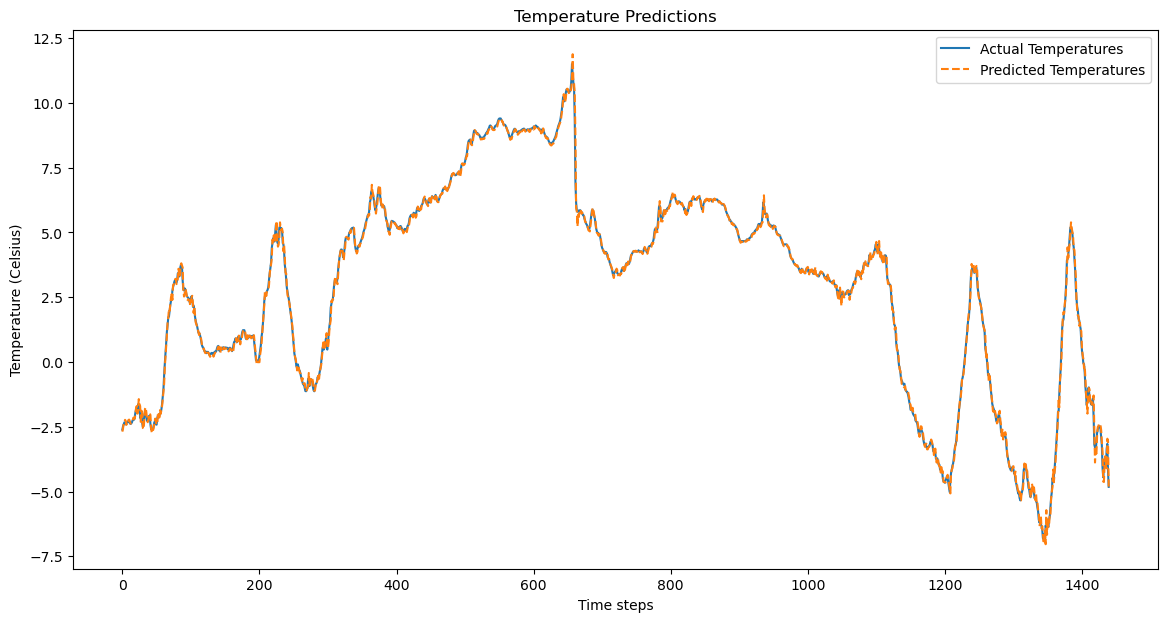

In [23]:
# Plot the last 1440 observations and their predictions
plt.figure(figsize=(14, 7))
plt.plot(range(1440), y_val[-1440:], label='Actual Temperatures')
plt.plot(range(1440), predictions, label='Predicted Temperatures', linestyle='dashed')
plt.xlabel('Time steps')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Predictions')
plt.legend()
plt.show()